# Абсолютно упругий центральный удар

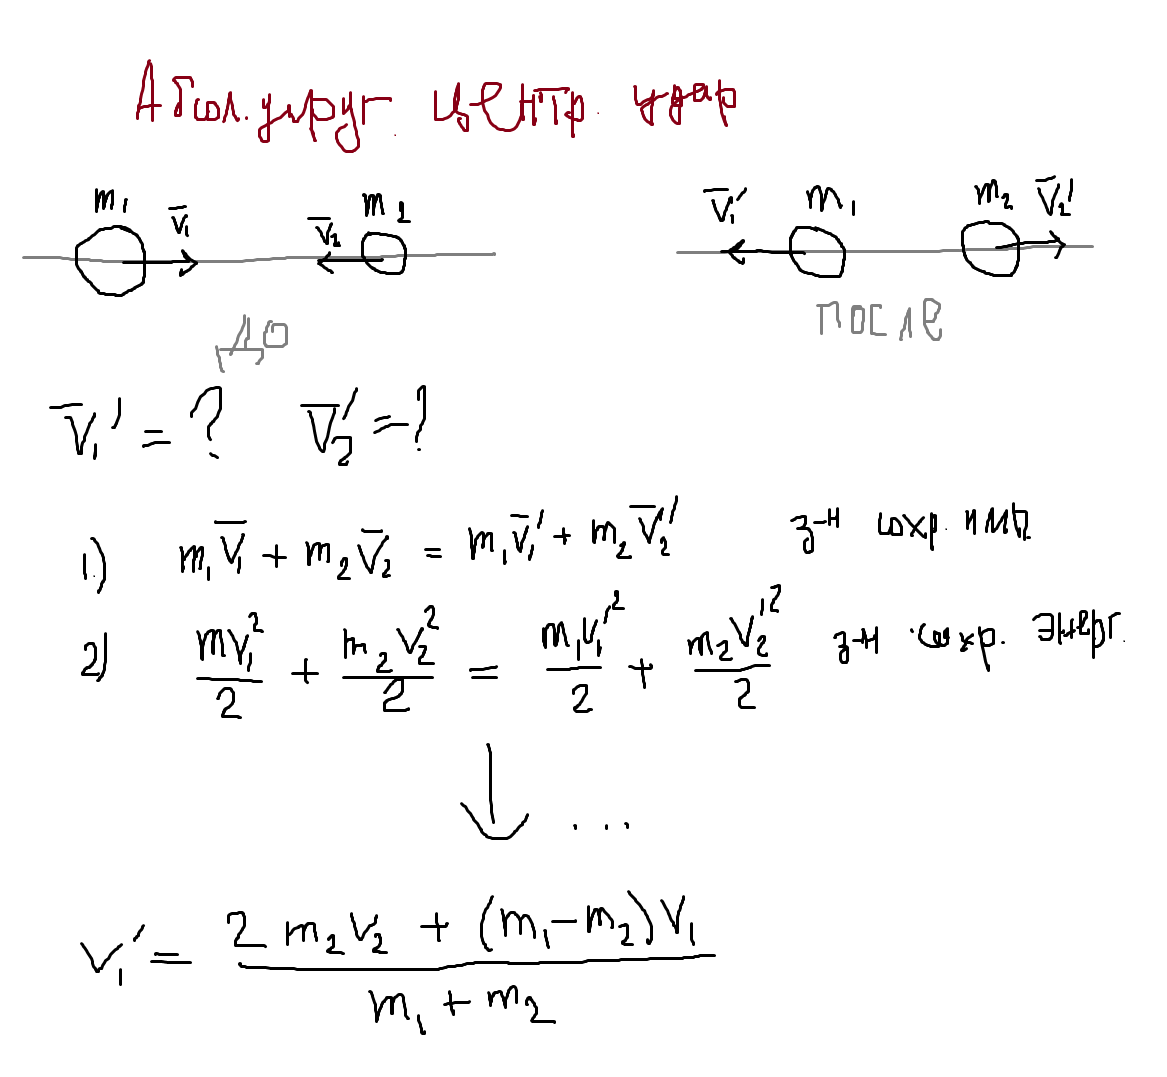

In [1]:
import random

class Particle():
    
    def __init__(self, radius, mass, position, velocity):
        self.radius = radius
        self.mass = mass
        self.position = position
        self.velocity = velocity
        
    def move(self):
        
        force = [0,0]
        force[0] = g[0] * self.mass + (-k) * self.velocity[0]
        force[1] = g[1] * self.mass + (-k) * self.velocity[1]
        
        self.velocity[0] += 1/self.mass * force[0] * dt
        self.velocity[1] += 1/self.mass * force[1] * dt
        
        self.position[0] += self.velocity[0] * dt
        self.position[1] += self.velocity[1] * dt
        
        # проверка столкновения с нижней стенкой
        D = height - self.position[1]
        if D < self.radius:
            self.position[1] -= (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с верхней стенкой
        D = self.position[1]
        if D < self.radius:
            self.position[1] += (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с правой стенкой
        D = width - self.position[0]
        if D < self.radius:
            self.position[0] -= (self.radius - D)
            self.velocity[0] *= -1
        # проверка столкновения с левой стенкой
        D = self.position[0]
        if D < self.radius:
            self.position[0] += (self.radius - D)
            self.velocity[0] *= -1
        
    def draw(self):
        pygame.draw.circle(screen, (0,0,0), tuple(self.position), 
                           self.radius, 2)
        
        
#######################################################

dt = .05
my_particles = []
num = 2
g = [0, 0]
k = 0

'''
for i in range(num):
    p = Particle(random.randint(10,30), random.randint(10,20), [420,240],
                 [random.uniform(-2,2),random.uniform(-2,2)])
    my_particles.append(p)
'''

my_particles.append(Particle(10, 10, [50,240], [2,0]))
my_particles.append(Particle(15, 15, [700,240],[-1,0]))

#######################################################

import pygame

background_color = (255,255,0)
(width, height) = (840, 480)

screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('сила трения')

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    screen.fill(background_color)
    
    for i in my_particles:
        i.move()
        i.draw()
    
    pygame.display.flip()
    
pygame.quit()

pygame 2.1.0 (SDL 2.0.16, Python 3.8.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


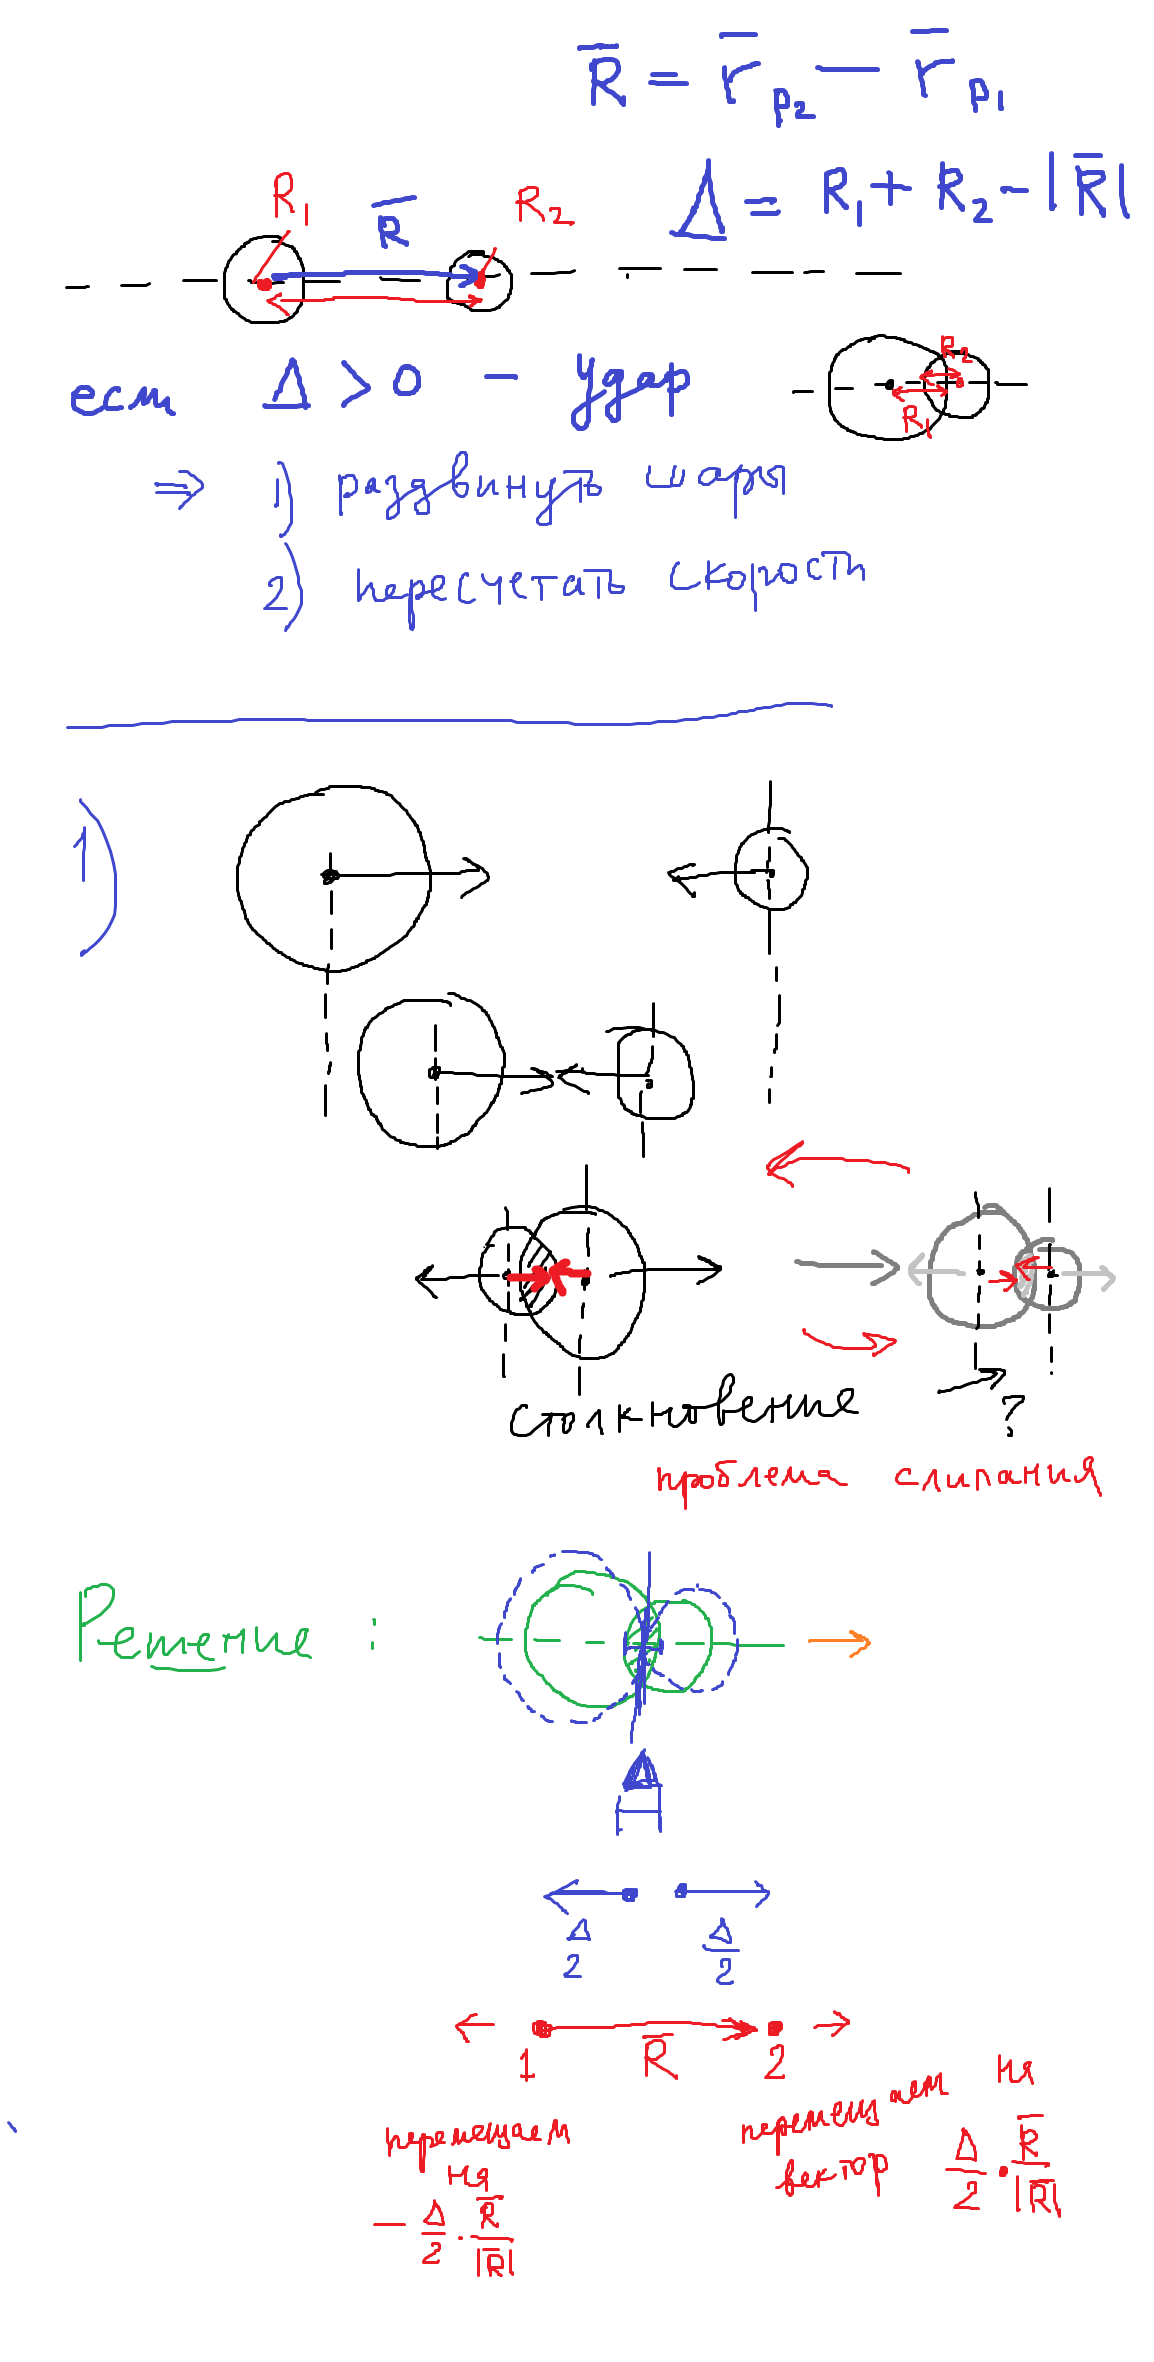

In [7]:
import random
import math

class Particle():
    
    def __init__(self, radius, mass, position, velocity):
        self.radius = radius
        self.mass = mass
        self.position = position
        self.velocity = velocity
        
    def move(self):
        
        force = [0,0]
        force[0] = g[0] * self.mass + (-k) * self.velocity[0]
        force[1] = g[1] * self.mass + (-k) * self.velocity[1]
        
        self.velocity[0] += 1/self.mass * force[0] * dt
        self.velocity[1] += 1/self.mass * force[1] * dt
        
        self.position[0] += self.velocity[0] * dt
        self.position[1] += self.velocity[1] * dt
        
        # проверка столкновения с нижней стенкой
        D = height - self.position[1]
        if D < self.radius:
            self.position[1] -= (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с верхней стенкой
        D = self.position[1]
        if D < self.radius:
            self.position[1] += (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с правой стенкой
        D = width - self.position[0]
        if D < self.radius:
            self.position[0] -= (self.radius - D)
            self.velocity[0] *= -1
        # проверка столкновения с левой стенкой
        D = self.position[0]
        if D < self.radius:
            self.position[0] += (self.radius - D)
            self.velocity[0] *= -1
        
    def draw(self):
        pygame.draw.circle(screen, (0,0,0), tuple(self.position), 
                           self.radius, 2)
        
def collide(p1, p2):
    R = [(i-j) for i,j in zip(p1.position,p2.position)]
    R_abs = math.sqrt(sum([i**2 for i in R]))
    R_unit = [i/R_abs for i in R]
    Delta = p1.radius + p2.radius - R_abs
    
    if Delta > 0:
        
        v1 = p1.velocity[0]
        v2 = p2.velocity[0]
        m1 = p1.mass
        m2 = p2.mass
        
        p1.velocity[0] = (2*m2*v2 - (m1 - m2)*v1) / (m1 + m2)
        p2.velocity[0] = (2*m1*v1 - (m2 - m1)*v2) / (m2 + m1)
        
        p1.position[0] += - (Delta/2 * R_unit[0] + .5)
        p2.position[0] +=   (Delta/2 * R_unit[0] + .5)
        
        
#######################################################

dt = .05
my_particles = []
num = 2
g = [0, 0]
k = 0

'''
for i in range(num):
    p = Particle(random.randint(10,30), random.randint(10,20), [420,240],
                 [random.uniform(-2,2),random.uniform(-2,2)])
    my_particles.append(p)
'''

my_particles.append(Particle(10, 10, [50,240], [5,0]))
my_particles.append(Particle(15, 15, [700,240],[-3,0]))

#######################################################

import pygame

background_color = (255,255,0)
(width, height) = (840, 480)

screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('сила трения')

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    screen.fill(background_color)
    
    for i in my_particles:
        i.move()
        i.draw()
    collide(my_particles[0], my_particles[1])
    
    pygame.display.flip()
    
pygame.quit()